## Hands-on - Basic Statistics in Python

In [100]:
# Import necessary libraries
import pandas as pd  # for handling tabular datasets
import numpy as np  # for numerical computations
from scipy import stats  # for statistical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for advanced statistical plots

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/medical_examination.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
   id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    2     168    62.0    110     80            1     1      0   
1   1  20228    1     156    85.0    140     90            3     1      0   
2   2  18857    1     165    64.0    130     70            3     1      0   
3   3  17623    2     169    82.0    150    100            1     1      0   
4   4  17474    1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


### **Exercise 1: Display Dataset Information**
**Question:** Use df.info() to display basic information about the dataset.

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### **Exercise 2: Calculate Minimum and Maximum Values**  
**Question:** Calculate the **minimum** and **maximum** values for the following columns:  

- **"height"**  
- **"weight"**  
- **"ap_hi"** (systolic blood pressure)  
- **"ap_lo"** (diasblood pressure)re)  


In [102]:
min_h = df['height'].min()
max_h = df['height'].max()
print(f'Minimum height: {min_h}')
print(f'Maximum height: {max_h}')

min_w = df['weight'].min()
max_w = df['weight'].max()
print(f'Minimum weight: {min_w}')
print(f'Maximum weight: {max_w}')

min_ap_hi = df['ap_hi'].min()
max_ap_hi = df['ap_hi'].max()
print(f'Minimum ap_hi: {min_ap_hi}')
print(f'Maximum ap_hi: {max_ap_hi}')

min_ap_lo = df['ap_lo'].min()
max_ap_lo = df['ap_lo'].max()
print(f'Minimum ap_lo: {min_ap_lo}')
print(f'Maximum ap_lo: {max_ap_lo}')

Minimum height: 55
Maximum height: 250
Minimum weight: 10.0
Maximum weight: 200.0
Minimum ap_hi: -150
Maximum ap_hi: 16020
Minimum ap_lo: -70
Maximum ap_lo: 11000


### **Exercise 3: Compute Measures of Central Tendency**  
**Question:** Calculate the **mean**, **median**, and **mode** for the specified columns:  

- **Mean:** Compute the mean of the **"weight"** column.  
- **Median:** Compute the median of the **"ap_hi"** (systolic blood pressure) column.  
- **Mode:** Compute the mode of the **"gender"** column.  

In [103]:
# Mean of weight
mean_w = np.mean(list(df['weight']))
print(f'Mean weight: {mean_w}')

# Median of ap_hi
median_ap_hi = np.median(list(df['ap_hi']))
print(f'Median ap_hi: {median_ap_hi}')

# Mode of gender
mode_gender = stats.mode(list(df['sex']), keepdims=True).mode.item()
print(f'Mode of gender: {mode_gender}')

Mean weight: 74.20569
Median ap_hi: 120.0
Mode of gender: 1


### **Exercise 4: Compute Quantiles and Interquartile Range (IQR)**  
**Question:** Compute the **Q1**, **Q2 (median)**, and **Q3** for the **"cholesterol"** column and calculate the **Interquartile Range (IQR)**. 


In [104]:
chol_q1 = df['cholesterol'].quantile(0.25)
chol_q2 = np.median(list(df['cholesterol']))
chol_q3 = df['cholesterol'].quantile(0.75)

iqr_chol = chol_q3 - chol_q1

print(f'Q1 cholesterol: {chol_q1:.2f}')
print(f'Q2 (median) cholesterol: {chol_q2:.2f}')
print(f'Q3 cholesterol: {chol_q3:.2f}')
print(f'Interquartile range of cholesterol: {iqr_chol:.2f}')

Q1 cholesterol: 1.00
Q2 (median) cholesterol: 1.00
Q3 cholesterol: 2.00
Interquartile range of cholesterol: 1.00


### **Exercise 5: Grouped Analysis by Gender**  
**Question:** Calculate the **mean** of the **"weight"** column grouped by **"gender"**. 


sex
1    72.565902
2    77.258565
3    69.818182
Name: weight, dtype: float64


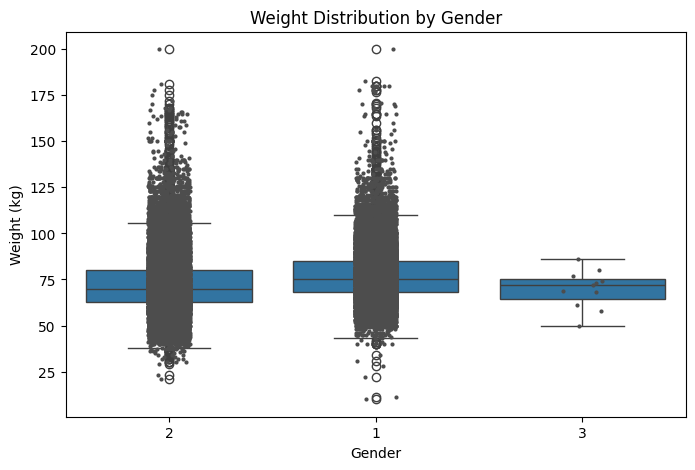

In [105]:
# Grouping the dataframe and calculating mean for each group
mean_by_gender = df.groupby('sex')['weight'].mean()
print(mean_by_gender)

# Testing boxplot

plt.figure(figsize=(8,5))
sns.boxplot(x=df['sex'], y=df['weight'])
sns.stripplot(x=df['sex'], y=df['weight'], color='.3', jitter=True, size=3)
plt.xticks(range(len(set(df['sex']))), labels=df['sex'].unique())

plt.xlabel("Gender")
plt.ylabel("Weight (kg)")
plt.title("Weight Distribution by Gender")

plt.show()